# Data description & Problem statement: 
The MNIST ("Modified National Institute of Standards and Technology") dataset contains gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* Dataset is slightly imbalanced. The data has 28x28 variables (or pixels) in total.
* This is a multi-class classification task. The classification goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

# Workflow:
- Load the dataset
- Data Cleaning/Wrangling: Encode categorical variables, etc.
- Split data into training & test parts (utilize the training part for training & hyperparameter tuning of model, and test part for the final evaluation of model)
   #  Model Training:
- Build a Deep Neural Network with Keras/TensorFlow.

   # Model Evaluation: 
- Evaluate the Deep Neural Network model with optimized hyperparameters on Test Dataset, by calculating:
     - Accuracy
     - f1 Score
     - Confusion matrix

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
data=mnist.load_data()[0][0]
target=mnist.load_data()[0][1]

X=pd.DataFrame(data.reshape(60000,784))

# Re-scaling of data:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#X=StandardScaler().fit(X).transform(X)

# Decode the target: 
from keras.utils import to_categorical
y=to_categorical(target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Keras Neural Networks: ___________________
n_input=X.shape[1]

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

model=Sequential()

model.add(Dense(200, activation="relu", input_shape=(n_input, )))
model.add(Dropout(0.25))
model.add(Dense(500, activation="sigmoid"))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adagrad", loss="categorical_crossentropy", metrics=['accuracy'])

monitor=EarlyStopping(monitor='val_acc', min_delta=1e-3, patience=3, mode="auto")
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True) # save best model

history=model.fit(X_train,y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[monitor, checkpointer])
model.load_weights('best_weights.hdf5') # load weights from best model

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 20s 413us/step - loss: 0.4655 - acc: 0.8569 - val_loss: 0.1976 - val_acc: 0.9397

Epoch 00001: val_acc improved from -inf to 0.93967, saving model to best_weights.hdf5
Epoch 2/200
48000/48000 [==============================] - 19s 401us/step - loss: 0.2176 - acc: 0.9330 - val_loss: 0.1461 - val_acc: 0.9556

Epoch 00002: val_acc improved from 0.93967 to 0.95558, saving model to best_weights.hdf5
Epoch 3/200
48000/48000 [==============================] - 19s 403us/step - loss: 0.1807 - acc: 0.9444 - val_loss: 0.1242 - val_acc: 0.9630

Epoch 00003: val_acc improved from 0.95558 to 0.96300, saving model to best_weights.hdf5
Epoch 4/200
48000/48000 [==============================] - 19s 397us/step - loss: 0.1555 - acc: 0.9530 - val_loss: 0.1170 - val_acc: 0.9649

Epoch 00004: val_acc improved from 0.96300 to 0.96492, saving model to best_weights.hdf5
Epoch 5/200
48000/48000 [========

In [5]:
model.load_weights('best_weights.hdf5') # load weights from best model
print("Training Accuracy = ", model.evaluate(X_train, y_train, verbose=0)[1],"\n")
print('Training loss: {}'.format(model.evaluate(X_train, y_train, verbose=0)[0]),"\n")
print("Test Accuracy = ", model.evaluate(X_test, y_test, verbose=0)[1] ,"\n")
print('Test loss: {}'.format(model.evaluate(X_test, y_test, verbose=0)[0]),"\n")

Training Accuracy =  0.9867291666666667 

Training loss: 0.043317345545995825 

Test Accuracy =  0.9741666666666666 

Test loss: 0.09271473877861475 



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


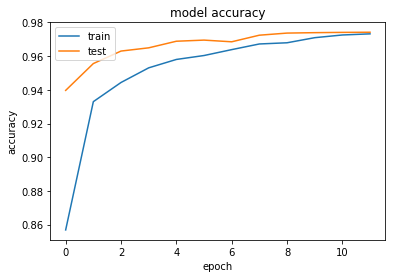

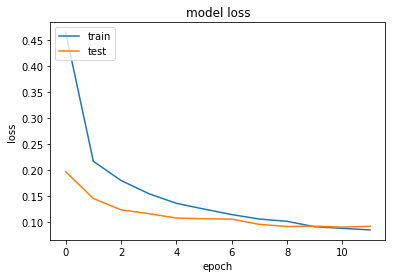

In [6]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[1157    0    5    1    3    2    3    1    2    1]
 [   0 1316    3    0    1    0    1    0    1    0]
 [   0    6 1145    3    2    1    0   11    5    1]
 [   2    1   17 1156    0   15    0    7   14    7]
 [   1    1    1    1 1153    1    6    1    0   11]
 [   5    1    2    8    3 1068    6    3    4    4]
 [   4    3    1    0    2    4 1161    0    2    0]
 [   0   10   10    1    3    1    0 1271    1    2]
 [   4    7    5    6    5    8    3    2 1115    5]
 [   4    2    2    1   16    2    2   13    4 1148]]
Normalized confusion matrix
[[9.85e-01 0.00e+00 4.26e-03 8.51e-04 2.55e-03 1.70e-03 2.55e-03 8.51e-04
  1.70e-03 8.51e-04]
 [0.00e+00 9.95e-01 2.27e-03 0.00e+00 7.56e-04 0.00e+00 7.56e-04 0.00e+00
  7.56e-04 0.00e+00]
 [0.00e+00 5.11e-03 9.75e-01 2.56e-03 1.70e-03 8.52e-04 0.00e+00 9.37e-03
  4.26e-03 8.52e-04]
 [1.64e-03 8.20e-04 1.39e-02 9.48e-01 0.00e+00 1.23e-02 0.00e+00 5.74e-03
  1.15e-02 5.74e-03]
 [8.50e-04 8.50e-04 8

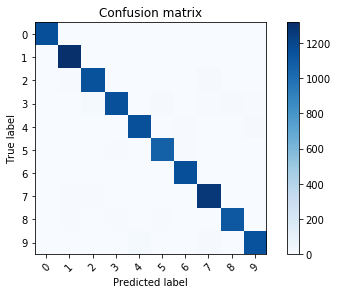

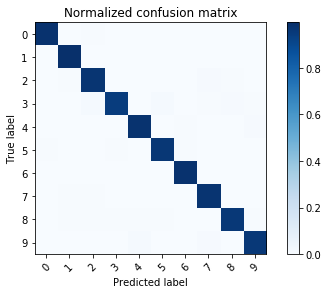

In [7]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, names)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, names, title='Normalized confusion matrix')

plt.show()

In [8]:
# Classification report:
report=classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print(report)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1175
          1       0.98      1.00      0.99      1322
          2       0.96      0.98      0.97      1174
          3       0.98      0.95      0.96      1219
          4       0.97      0.98      0.98      1176
          5       0.97      0.97      0.97      1104
          6       0.98      0.99      0.98      1177
          7       0.97      0.98      0.97      1299
          8       0.97      0.96      0.97      1160
          9       0.97      0.96      0.97      1194

avg / total       0.97      0.97      0.97     12000



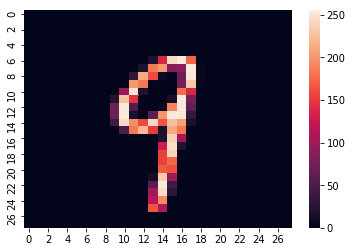

In [9]:
sns.heatmap(np.array(X)[900,:].reshape(28,28))